# ODE: example of unstable scheme

Consider the ODE
$$
y' = \alpha y, \qquad y(0) = 1
$$
whose exact solution is
$$
y(t) = \exp(\alpha t)
$$
Consider the simple scheme
$$
y_0 = 1, \qquad y_1 = \exp(\alpha h), \qquad
\frac{y_{i+1} - y_{i-1}}{2h} = \alpha y_i, \qquad i=1,2,\ldots
$$
i.e., with $a = 2\alpha h$, iterative scheme is
$$
y_{i+1} = a y_i + y_{i-1}, \qquad i=1,2,\ldots
$$

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from numpy import zeros,exp
from matplotlib.pyplot import plot,xlabel,ylabel,legend

The following function performs the solution of the ode.

In [14]:
def ode(alpha,h,N):
    """
    h = step size
    N = number of steps to take
    """
    y = zeros(N)
    t = zeros(N)
    t[0], y[0] = 0, 1
    t[1], y[1] = h, exp(alpha*h)
    a = 2.0*alpha*h
    for i in range(1,N-1):
        y[i+1] = a*y[i] + y[i-1]
        t[i+1] = t[i] + h
    ye = exp(alpha*t)
    plot(t,y,'o-',t,ye,'r-')
    xlabel('t')
    ylabel('y')
    legend(('Numerical','Exact'))

First try with $\alpha=1$.

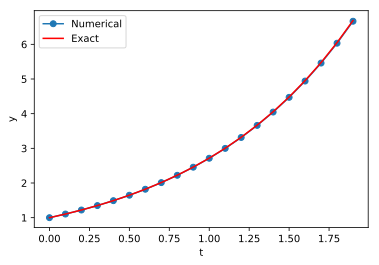

In [15]:
alpha = 1
h = 0.1
N = 20
ode(alpha,h,N)

The numerical solution seems to be a good approximation of the true solution.

Now try with $\alpha=-1$.

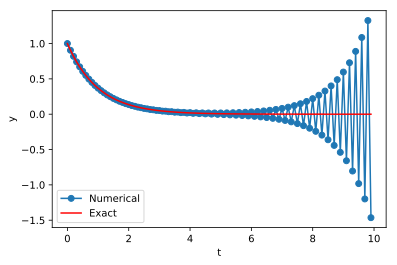

In [16]:
alpha = -1
h = 0.1
N = 100
ode(alpha,h,N)

Now things are not so good. Initially, the numerical solution is good but it becomes inaccurate for larger number of iterations. In fact the numerical solutions seems to *blow-up* indicating some form of instability.